#Cell1:Import Libraries and Setup


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#Set visualization style

In [2]:
sns.set_style('whitegrid')

print("Libraries loaded successfully.")


Libraries loaded successfully.


# Cell 2: Load Data and Initial Inspection

In [3]:
try:
    df = pd.read_csv('train.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: 'train.csv' not found. Please ensure the file is in the same directory.")
    # Create a small dummy dataframe for demonstration if the file is missing
    data = {
        'PassengerId': range(1, 11),
        'Survived': [0, 1, 1, 1, 0, 0, 0, 0, 1, 1],
        'Pclass': [3, 1, 3, 1, 3, 3, 1, 3, 2, 3],
        'Name': ['Braund, Mr. Owen Harris', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'Allen, Mr. William Henry', 'Moran, Mr. James', 'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard', 'Nasser, Mrs. Nicholas (Adele Achem)', 'Pekic, Mr. Tido'],
        'Sex': ['male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'male'],
        'Age': [22.0, 38.0, 26.0, 35.0, 35.0, np.nan, 54.0, 2.0, 27.0, np.nan],
        'SibSp': [1, 1, 0, 1, 0, 0, 0, 3, 1, 0],
        'Parch': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        'Ticket': ['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450', '330877', '17463', '349909', '237736', '349237'],
        'Fare': [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.2417, 7.8958],
        'Cabin': [np.nan, 'C85', np.nan, 'C123', np.nan, np.nan, 'E46', np.nan, np.nan, np.nan],
        'Embarked': ['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'C', 'S']
    }
    df = pd.DataFrame(data)


Error: 'train.csv' not found. Please ensure the file is in the same directory.


# Display first few rows and check data types

In [4]:
print("\nFirst 5 rows of data:")
print(df.head())
print("\nData Information:")
df.info()


First 5 rows of data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0

# Cell 3: Exploratory Data Analysis (EDA) - Key Survival Factors

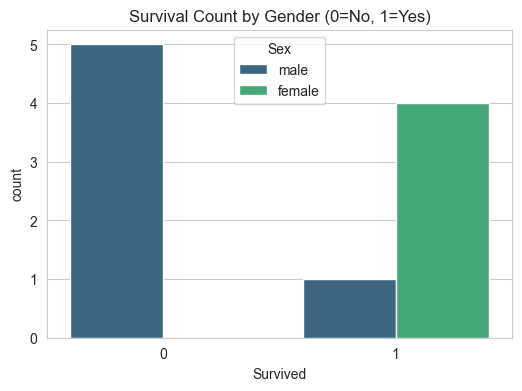

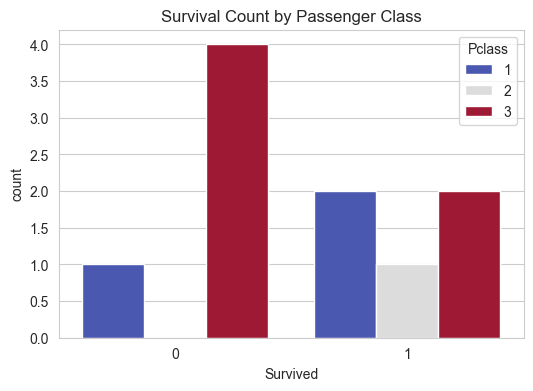

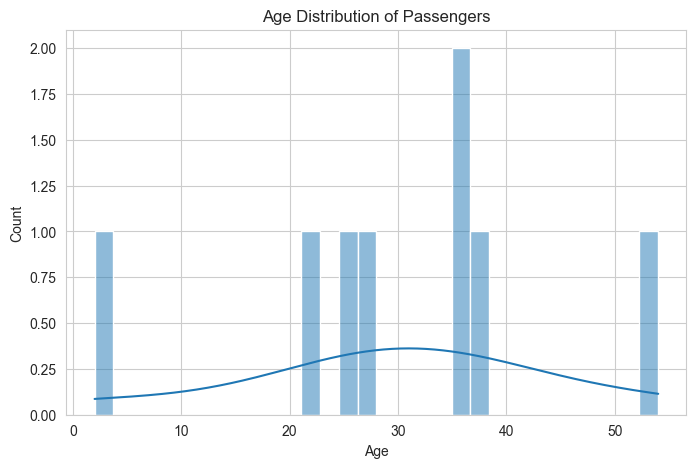

In [5]:
# 3.1 Survival Rate by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=df, palette='viridis')
plt.title('Survival Count by Gender (0=No, 1=Yes)')
plt.show()
# Observation: A significantly higher proportion of females survived compared to males.

# 3.2 Survival Rate by Passenger Class (Pclass)
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Pclass', data=df, palette='coolwarm')
plt.title('Survival Count by Passenger Class')
plt.show()
# Observation: Passengers in Pclass 1 had a much higher survival rate.

# 3.3 Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()


# Cell 4: Data Preprocessing - Handling Missing Values

In [6]:

print("\nMissing Values before Imputation:")
print(df.isnull().sum())

# 4.1 Handle Missing 'Age': Fill with the median age (a robust method)
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# 4.2 Handle Missing 'Embarked': Fill with the most frequent value (Mode)
most_frequent_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_embarked, inplace=True)

# 4.3 Drop 'Cabin', 'Name', and 'Ticket': Too many missing values or not relevant for a simple model
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

print("\nMissing Values after Imputation and Dropping Columns:")
print(df.isnull().sum())
print("\nDataframe after cleanup:")
print(df.head())


Missing Values before Imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            2
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          7
Embarked       0
dtype: int64

Missing Values after Imputation and Dropping Columns:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Dataframe after cleanup:
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


/var/folders/ff/ft06frx900ng8pn1_09hhzr00000gn/T/ipykernel_94649/2592571121.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
/var/folders/ff/ft06frx900ng8pn1_09hhzr00000gn/T/ipykernel_94649/2592571121.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

# Cell 5: Feature Engineering and Encoding

In [7]:
# 5.1 Feature Engineering: Create a feature indicating if the passenger is alone
# SibSp = # of siblings/spouse aboard, Parch = # of parents/children aboard
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # +1 for the person themselves
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# Drop the original features
df.drop(['SibSp', 'Parch', 'FamilySize'], axis=1, inplace=True)

# 5.2 Encoding Categorical Variables ('Sex' and 'Embarked')
# Convert 'Sex' (male/female) to 0/1 using mapping
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Use One-Hot Encoding for 'Embarked' (S, C, Q)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print("\nDataframe after Feature Engineering and Encoding:")
print(df.head())


Dataframe after Feature Engineering and Encoding:
   Survived  Pclass  Sex   Age     Fare  IsAlone  Embarked_Q  Embarked_S
0         0       3    0  22.0   7.2500        0       False        True
1         1       1    1  38.0  71.2833        0       False       False
2         1       3    1  26.0   7.9250        1       False        True
3         1       1    1  35.0  53.1000        0       False        True
4         0       3    0  35.0   8.0500        1       False        True


# Cell 6: Model Building (Logistic Regression)


In [9]:
# Define Features (X) and Target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

# Initialize and Train the Logistic Regression model
model = LogisticRegression(max_iter=200) # Increased max_iter for convergence
model.fit(X_train, y_train)

print("\nLogistic Regression Model trained successfully.")



Training set size: 8 samples
Testing set size: 2 samples

Logistic Regression Model trained successfully.


# Cell 7: Model Evaluation

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on Test Set: {accuracy:.4f}")

# Display detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Interpretation of Coefficients (What the model learned)
coefficients = pd.Series(model.coef_[0], index=X.columns)
print("\nFeature Coefficients (Impact on Survival Probability):")
print(coefficients.sort_values(ascending=False))


Model Accuracy on Test Set: 0.0000

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0


Feature Coefficients (Impact on Survival Probability):
Sex           0.896282
Embarked_S    0.243303
IsAlone       0.126294
Age           0.005086
Fare         -0.004912
Pclass       -0.136364
Embarked_Q   -0.242636
dtype: float64


/Users/aungkokooo/Desktop/Data Scinece/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/aungkokooo/Desktop/Data Scinece/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/aungkokooo/Desktop/Data Scinece/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,